In [1]:
import os 
import tensorflow as tf 
import pandas as pd 
import keras 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np

In [2]:
train_dir = "../data/10_food_classes_all_data/train/"
test_dir = "../data/10_food_classes_all_data/test/"

In [3]:
for directory, folders, files in os.walk(train_dir): 
    print(f"There are {len(folders)} folders and {len(files)} files in '{directory}'")

There are 10 folders and 0 files in '../data/10_food_classes_all_data/train/'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/chicken_curry'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/chicken_wings'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/fried_rice'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/grilled_salmon'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/hamburger'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/ice_cream'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/pizza'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/ramen'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/steak'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/sushi'


In [4]:
class_names = np.array(sorted(os.listdir(train_dir)))

In [5]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [6]:
import random
def view_random_image(folderpath):
    class_names = sorted(os.listdir(folderpath)) 
    random_class = random.choice(class_names)
    path = os.path.join(folderpath, random_class)
    random_image = random.choice(os.listdir(path))
    imgpath = os.path.join(path, random_image)
    img = mpimg.imread(imgpath)
    plt.imshow(img)
    plt.title(f"{random_class} / {img.shape}")
    plt.axis("off")
    plt.show();
    

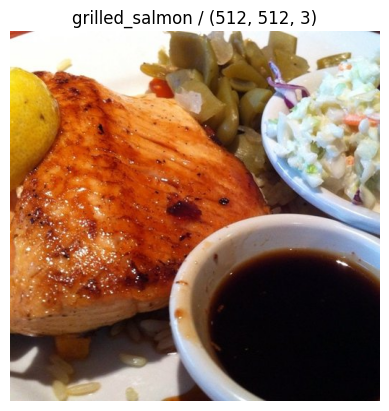

In [7]:
view_random_image(train_dir)

In [8]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir, 
    image_size=IMG_SIZE, 
    batch_size=BATCH_SIZE, 
    # shuffle=False, 
    label_mode="categorical"
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, 
    image_size=IMG_SIZE, 
    batch_size=BATCH_SIZE, 
    # shuffle=False, 
    label_mode="categorical"
)

# train_ds = train_ds.cache().shuffle(1000, reshuffle_each_iteration=True).prefetch(tf.data.AUTOTUNE)
# test_ds = test_ds.cache().prefetch(tf.data.AUTOTUNE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
## Model-1 

augmentation = keras.Sequential([
    # keras.layers.RandomBrightness(0.1), 
    # keras.layers.RandomContrast(0.1), 
    keras.layers.RandomFlip("horizontal"), 
    keras.layers.RandomRotation(0.055), 
    keras.layers.RandomTranslation(0.1, 0.1), 
    keras.layers.RandomZoom(0.2)
], name="augmentation")

model_1 = keras.Sequential([
    keras.layers.Input(shape=(224, 224, 3)), 
    augmentation, 
    keras.layers.Rescaling(1./255.), 
    keras.layers.Conv2D(filters=10, 
                       kernel_size=3, 
                       activation='relu'), 
    keras.layers.Conv2D(10, 3, activation='relu'), 
    keras.layers.MaxPool2D(pool_size=2, 
                          padding="valid"), 
    keras.layers.Conv2D(10, 3, activation='relu'), 
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(10, 3, activation='relu'), 
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.MaxPool2D(), 
    keras.layers.GlobalAveragePooling2D(), 
    # keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
], name="Model_1") 


model_1.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics = [
        tf.keras.metrics.CategoricalAccuracy(name="acc"),
        tf.keras.metrics.TopKCategoricalAccuracy(k=5, name="top5_acc"),
    ]
)


model_1.summary()

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augmentation (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 51, 51, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 49, 49, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 10)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,940 (19.30 KB)

 Trainable params: 4,940 (19.30 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
import datetime 

lod_dir = os.path.join("logs/", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="loss", 
        patience=5, 
        restore_best_weights=True
    ), 
    keras.callbacks.ReduceLROnPlateau(
        monitor="loss", 
        patience=5,
        factor=0.5, 
        min_lr=1e-6, 
        verbose=1
    ), 
    keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(lod_dir, "best.keras"),
        monitor="loss",
        save_best_only=True,
    ), 
    keras.callbacks.TensorBoard(
        log_dir=lod_dir, 
        histogram_freq=0,
        write_graph=True,
        write_images=False,
        write_steps_per_second=False,
        update_freq='epoch',
        profile_batch=0,
        embeddings_freq=0,
        embeddings_metadata=None
    )
]

In [11]:
history_1 = model_1.fit(
                train_ds, 
                validation_data=test_ds, 
                epochs=150, 
                callbacks=callbacks, 
                verbose=1
            )

Epoch 1/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - acc: 0.0984 - loss: 2.3016 - top5_acc: 0.4882 - val_acc: 0.1039 - val_loss: 2.2899 - val_top5_acc: 0.5203 - learning_rate: 0.0010
Epoch 2/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - acc: 0.1090 - loss: 2.2767 - top5_acc: 0.5311 - val_acc: 0.1303 - val_loss: 2.1656 - val_top5_acc: 0.5684 - learning_rate: 0.0010
Epoch 3/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - acc: 0.1407 - loss: 2.1733 - top5_acc: 0.5867 - val_acc: 0.1569 - val_loss: 2.1794 - val_top5_acc: 0.6145 - learning_rate: 0.0010
Epoch 4/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - acc: 0.1618 - loss: 2.1439 - top5_acc: 0.6243 - val_acc: 0.1751 - val_loss: 2.0613 - val_top5_acc: 0.6438 - learning_rate: 0.0010
Epoch 5/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - acc: 0.1798 - loss: 2.1172 - top5_acc: 0.6511 - val_acc: 0.1904 - val_loss: 2.0349 - val_top5_acc: 0.6643 - learning_rate: 0.0010
Epoch 6/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - acc: 0.1945 -

In [12]:
model_1.evaluate(test_ds)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.4002 - loss: 1.4932 - top5_acc: 0.8392


[1.4975999593734741, 0.4003309905529022, 0.8392084836959839]

<Axes: >

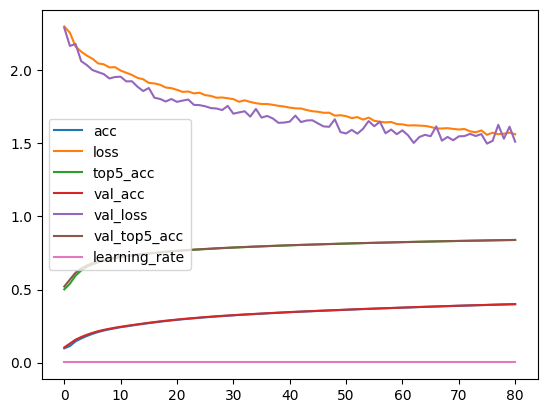

In [13]:
pd.DataFrame(history_1.history).plot()

In [14]:
## Model-2

augmentation = keras.Sequential([
    # keras.layers.RandomBrightness(0.1), 
    # keras.layers.RandomContrast(0.1), 
    keras.layers.RandomFlip("horizontal"), 
    keras.layers.RandomRotation(0.055), 
    keras.layers.RandomTranslation(0.1, 0.1), 
    keras.layers.RandomZoom(0.2)
], name="augmentation")

model_2 = keras.Sequential([
    keras.layers.Input(shape=(224, 224, 3)), 
    augmentation, 
    keras.layers.Rescaling(1./255.), 
    keras.layers.Conv2D(filters=10, 
                       kernel_size=3, 
                       activation='relu'), 
    keras.layers.Conv2D(10, 3, activation='relu'), 
    keras.layers.MaxPool2D(pool_size=2, 
                          padding="valid"), 
    keras.layers.Conv2D(10, 3, activation='relu'), 
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(10, 3, activation='relu'), 
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.MaxPool2D(), 
    keras.layers.GlobalAveragePooling2D(), 
    # keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
], name="Model_1") 


model_2.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics = [
        tf.keras.metrics.CategoricalAccuracy(name="acc"),
        tf.keras.metrics.TopKCategoricalAccuracy(k=5, name="top5_acc"),
    ]
)


model_2.summary()

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augmentation (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 51, 51, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 49, 49, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 24, 24, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 10)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,940 (19.30 KB)

 Trainable params: 4,940 (19.30 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history_2 = model_2.fit(
                train_ds, 
                validation_data=test_ds, 
                epochs=30, 
                callbacks=callbacks, 
                verbose=1
            )

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - acc: 0.1070 - loss: 2.3005 - top5_acc: 0.5088 - val_acc: 0.1249 - val_loss: 2.2650 - val_top5_acc: 0.5374 - learning_rate: 0.0010
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - acc: 0.1314 - loss: 2.2562 - top5_acc: 0.5481 - val_acc: 0.1407 - val_loss: 2.2080 - val_top5_acc: 0.5726 - learning_rate: 0.0010
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - acc: 0.1436 - loss: 2.2132 - top5_acc: 0.5811 - val_acc: 0.1504 - val_loss: 2.1828 - val_top5_acc: 0.5960 - learning_rate: 0.0010
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - acc: 0.1532 - loss: 2.2044 - top5_acc: 0.6015 - val_acc: 0.1591 - val_loss: 2.1583 - val_top5_acc: 0.6126 - learning_rate: 0.0010
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - acc: 0.1616 - loss: 2.1881 - top5_acc: 0.6167 - val_acc: 0.1665 - val_loss: 2.1477 - val_top5_acc: 0.6250 - learning_rate: 0.0010


## How to overcome overfitting  

1. Get more data
2. Simplify the model
   * Reduce number of layers
   * Reduce number of hidden units
3. Use data augmentation
4. Use transfer learning  - Leverage the patterns another model has learned on similar data

<Axes: >

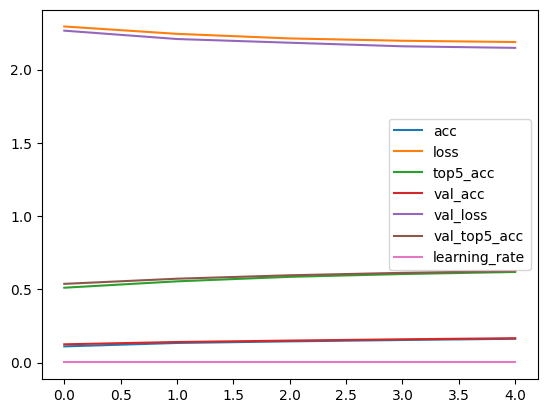

In [16]:
pd.DataFrame(history_2.history).plot()

In [17]:
## Model-2

augmentation = keras.Sequential([
    # keras.layers.RandomBrightness(0.1), 
    # keras.layers.RandomContrast(0.1), 
    keras.layers.RandomFlip("horizontal"), 
    keras.layers.RandomRotation(0.055), 
    keras.layers.RandomTranslation(0.1, 0.1), 
    keras.layers.RandomZoom(0.2)
], name="augmentation")

model_3 = keras.Sequential([
    keras.layers.Input(shape=(224, 224, 3)), 
    augmentation, 
    keras.layers.Rescaling(1./255.), 
    keras.layers.Conv2D(filters=10, 
                       kernel_size=3, 
                       activation='relu'), 
    keras.layers.MaxPool2D(pool_size=2, 
                          padding="valid"), 
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.MaxPool2D(), 
    keras.layers.GlobalAveragePooling2D(), 
    # keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
], name="Model_1") 


model_3.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics = [
        tf.keras.metrics.CategoricalAccuracy(name="acc"),
        tf.keras.metrics.TopKCategoricalAccuracy(k=5, name="top5_acc"),
    ]
)


model_3.summary()

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augmentation (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 10)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,210 (8.63 KB)

 Trainable params: 2,210 (8.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_3 = model_3.fit(
                train_ds, 
                validation_data=test_ds, 
                epochs=30, 
                # callbacks=callbacks, 
                verbose=1
            )

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - acc: 0.1010 - loss: 2.2973 - top5_acc: 0.5265 - val_acc: 0.1388 - val_loss: 2.2611 - val_top5_acc: 0.5616
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - acc: 0.1431 - loss: 2.2520 - top5_acc: 0.5724 - val_acc: 0.1584 - val_loss: 2.1910 - val_top5_acc: 0.5969
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - acc: 0.1624 - loss: 2.1960 - top5_acc: 0.6046 - val_acc: 0.1709 - val_loss: 2.1533 - val_top5_acc: 0.6215
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - acc: 0.1731 - loss: 2.1659 - top5_acc: 0.6289 - val_acc: 0.1800 - val_loss: 2.1308 - val_top5_acc: 0.6416
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - acc: 0.1829 - loss: 2.1439 - top5_acc: 0.6467 - val_acc: 0.1886 - val_loss: 2.1124 - val_top5_acc: 0.6563
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.1910 - loss: 2.1399 - top5_acc: 0.6601 - val_acc: 0.1956 - val_loss: 2.0996 - val_top5_acc: 0.6671
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━

In [ ]:
## Model-2

augmentation = keras.Sequential([
    # keras.layers.RandomBrightness(0.1), 
    # keras.layers.RandomContrast(0.1), 
    keras.layers.RandomFlip("horizontal"), 
    keras.layers.RandomRotation(0.055), 
    keras.layers.RandomTranslation(0.1, 0.1), 
    keras.layers.RandomZoom(0.2)
], name="augmentation")

model_4 = keras.Sequential([
    keras.layers.Input(shape=(224, 224, 3)), 
    augmentation, 
    keras.layers.Rescaling(1./255.), 
    keras.layers.Conv2D(filters=10, 
                       kernel_size=3, 
                       activation='relu'), 
    keras.layers.MaxPool2D(pool_size=2, 
                          padding="valid"), 
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.MaxPool2D(),
    keras.layers.GlobalAveragePooling2D(), 
    # keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
], name="Model_4") 


model_4.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics = [
        tf.keras.metrics.CategoricalAccuracy(name="acc"),
        tf.keras.metrics.TopKCategoricalAccuracy(k=5, name="top5_acc"),
    ]
)


model_4.summary()

In [ ]:
history_4 = model_4.fit(
                train_ds, 
                validation_data=test_ds, 
                epochs=30, 
                # callbacks=callbacks, 
                verbose=1
            )

In [ ]:
model_5 = keras.models.clone_model(model_1)
model_5.compile(
    loss="categorical_crossentropy", 
    optimizer=keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

model_5.summary()

In [ ]:
history_5 = model_5.fit(
                train_ds, 
                validation_data=test_ds, 
                epochs=30, 
                # callbacks=callbacks, 
                verbose=1
            )

In [ ]:
pd.DataFrame(history_5.history).plot()

In [ ]:
model_6 = keras.models.clone_model(model_5)

model_6 = keras.models.clone_model(model_1)
model_6.compile(
    loss="categorical_crossentropy", 
    optimizer=keras.optimizers.Adam(learning_rate=0.0005), 
    metrics=["accuracy"]
)

model_6.summary()

In [ ]:
history_6 = model_6.fit(
                train_ds, 
                validation_data=test_ds, 
                epochs=15, 
                # callbacks=callbacks, 
                verbose=1
            )

In [ ]:
## Model-2

augmentation = keras.Sequential([
    # keras.layers.RandomBrightness(0.1), 
    # keras.layers.RandomContrast(0.1), 
    keras.layers.RandomFlip("horizontal"), 
    keras.layers.RandomRotation(0.055), 
    keras.layers.RandomTranslation(0.1, 0.1), 
    keras.layers.RandomZoom(0.2)
], name="augmentation")

model_7 = keras.Sequential([
    keras.layers.Input(shape=(224, 224, 3)), 
    augmentation, 
    keras.layers.Rescaling(1./255.), 
    keras.layers.Conv2D(filters=64, 
                       kernel_size=3, 
                       activation='relu'), 
    keras.layers.MaxPool2D(pool_size=2, 
                          padding="valid"), 
    keras.layers.Conv2D(64, 3, activation="relu"), 
    keras.layers.MaxPool2D(),
    keras.layers.GlobalAveragePooling2D(), 
    # keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
], name="Model_7") 


model_7.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics = [
        tf.keras.metrics.CategoricalAccuracy(name="acc"),
        tf.keras.metrics.TopKCategoricalAccuracy(k=5, name="top5_acc"),
    ]
)


model_7.summary()

In [ ]:
history_7 = model_7.fit(
                train_ds, 
                validation_data=test_ds, 
                epochs=15, 
                # callbacks=callbacks, 
                verbose=1
            )

In [ ]:
## Model-2

augmentation = keras.Sequential([
    # keras.layers.RandomBrightness(0.1), 
    # keras.layers.RandomContrast(0.1), 
    keras.layers.RandomFlip("horizontal"), 
    keras.layers.RandomRotation(0.055), 
    keras.layers.RandomTranslation(0.1, 0.1), 
    keras.layers.RandomZoom(0.2)
], name="augmentation")

model_8 = keras.Sequential([
    keras.layers.Input(shape=(224, 224, 3)), 
    augmentation, 
    keras.layers.Rescaling(1./255.), 
    keras.layers.Conv2D(filters=128, 
                       kernel_size=3, 
                       activation='relu'), 
    keras.layers.MaxPool2D(pool_size=2, 
                          padding="valid"), 
    keras.layers.Conv2D(128, 3, activation="relu"), 
    keras.layers.MaxPool2D(),
    keras.layers.GlobalAveragePooling2D(), 
    # keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
], name="Model_8") 


model_8.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics = [
        tf.keras.metrics.CategoricalAccuracy(name="acc"),
        tf.keras.metrics.TopKCategoricalAccuracy(k=5, name="top5_acc"),
    ]
)


model_8.summary()

In [ ]:
history_8 = model_8.fit(
                train_ds, 
                validation_data=test_ds, 
                epochs=15, 
                # callbacks=callbacks, 
                verbose=1
            )